In [2]:
!cat data/joydata.txt

-1.72	-3.12	1
0.31	1.85	1
1.56	2.85	1
2.64	2.41	1
1.23	2.54	1
1.33	2.03	1
1.26	2.68	1
2.58	1.79	1
2.40	0.91	1
0.51	2.44	1
2.17	2.64	1
3.38	2.94	1
1.09	3.12	1
0.68	1.43	1
3.76	0.64	1
0.73	2.97	1
0.53	2.94	1
1.49	1.25	1
3.92	3.48	1
3.87	2.91	1
1.14	3.01	1
1.73	2.80	1
2.96	1.84	1
2.61	2.92	1
2.28	0.90	1
1.93	3.71	1
1.26	1.17	1
1.90	1.34	1
3.13	0.92	1
0.85	1.46	1
1.50	3.93	1
2.95	2.09	1
0.76	2.84	1
1.00	0.46	1
3.19	2.32	1
2.82	2.32	1
2.86	1.35	1
0.97	2.68	1
1.20	1.31	1
1.54	2.02	1
1.74	0.63	1
1.36	-0.22	1
2.63	0.40	1
0.90	2.05	1
1.26	2.54	1
0.71	2.27	1
1.96	0.83	1
2.52	1.83	1
2.76	2.82	1
3.16	3.34	1
1.10	-1.14	0
-1.33	0.34	0
0.76	-3.07	0
-0.37	-1.91	0
-1.84	-1.11	0
-1.50	0.24	0
-0.63	-1.53	0
-1.08	-1.23	0
0.29	-1.99	0
-1.26	-2.90	0
-5.27	-1.78	0
-0.49	-2.64	0
1.28	-3.64	0
-1.64	-1.96	0
0.25	-1.26	0
-1.48	-1.17	0
-2.94	-3.47	0
-2.19	-1.48	0
0.52	-0.02	0
-2.24	-2.12	0
-3.07	-2.09	0
-3.99	0.73	0
-2.41	-2.21	0
-3.45	-0.62	0
-3.96	-2.00	0
-2.95	-1.16	0
-2.42	-3.35	0
-1.64	-1.11	0
-1.61	-1.28	0


In [3]:
import numpy as np

In [4]:
data = np.genfromtxt('data/joydata.txt')
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)
print(x[:5])
print(y[:5])

[[-1.72 -3.12]
 [ 0.31  1.85]
 [ 1.56  2.85]
 [ 2.64  2.41]
 [ 1.23  2.54]]
[1 1 1 1 1]


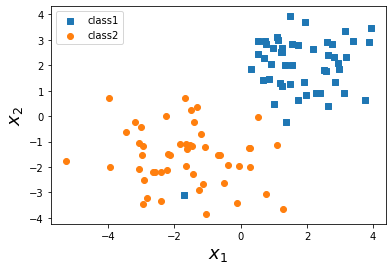

In [5]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

data = np.genfromtxt('data/joydata.txt')
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

plt.scatter(x[y==1,0], x[y==1,1], label='class1', marker='s')
plt.scatter(x[y==0,0], x[y==0,1], label='class2', marker='o')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$x_2$', fontsize = 18)
plt.legend()
plt.show()

In [6]:
data = np.genfromtxt('data/joydata.txt')
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)
print(x[:5], y[:5])
print(x[-5:], y[-5:])

[[-1.72 -3.12]
 [ 0.31  1.85]
 [ 1.56  2.85]
 [ 2.64  2.41]
 [ 1.23  2.54]] [1 1 1 1 1]
[[-2.26  0.01]
 [-1.41 -0.23]
 [-1.2  -0.71]
 [-1.69  0.7 ]
 [-1.52 -1.14]] [0 0 0 0 0]


In [7]:
np.random.shuffle(x)
np.random.shuffle(y)
print(x[:5], y[:5])
print(x[-5:], y[-5:])

[[ 3.76  0.64]
 [ 0.9   2.05]
 [ 3.38  2.94]
 [ 0.52 -0.02]
 [ 1.26  2.68]] [1 1 1 0 0]
[[-1.14 -2.66]
 [-3.45 -0.62]
 [ 0.53  2.94]
 [ 1.96  0.83]
 [-2.19 -1.48]] [0 0 1 1 1]


In [8]:
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)
print(x[:5], y[:5])
print(x[-5:], y[-5:])

[[ 3.92  3.48]
 [-3.96 -2.  ]
 [ 0.71  2.27]
 [ 3.19  2.32]
 [-2.41 -2.21]] [1 1 0 1 0]
[[ 1.56  2.85]
 [ 2.17  2.64]
 [-1.72 -3.12]
 [-1.84 -1.11]
 [ 1.73  2.8 ]] [1 1 0 1 1]


In [9]:
np.random.seed(1)
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)
num = int(x.shape[0] * 0.7)
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]


In [10]:
def perceptron_predict(X, w):
    z = np.dot(X, w)
    yhat = np.where(z > 0, 1, 0)
    return yhat

In [11]:
def perceptron_train(X, y, X0=False, eta=0.1, epochs=1, random_seed=1):
    """  Perceptron training function for binary class labels
    Input Parameters
        X : numpy.ndarray, shape=(n_samples, m_features), by default X0=False
            A 2D NumPy array containing the training examples
            or 
            If X0=True, X's shape=(n_samples, m_features+1) 
            It includes the bias or x0 = 1 for all samples 
        
        y : numpy.ndarray, shape=(n_samples,)
            A 1D NumPy array containing the true class labels
        
        X0: If True, then X must have X_0 = 1 in all samples.
             Set it Faslse, if X does not have X_0 
        
        eta : float (default: 0.1) 
            A learning rate for the parameter updates. Note that a learning
            rate has no effect on the direction of the decision boundary
            if the model weights are initialized to all zeros.
        
        epochs : int (default: 1), Number of passes over the training dataset.
        
        random_seed : int or None (default: 1)
            Seed for the pseudo-random number generator that initializes the
            weights w if w is None.
    
    Returns 
        w : numpy.ndarray, shape=(m_features, )
    
        If you wants W : numpy.ndarray, shape=(epochs, m_features) to use 
        when calling , then invoke this function with epochs = 1 multiple times 
        and save the result in the form of W = np.vstack([W, w]). 
        You may initialize the W = np.array([w]), where w is an initial weights.
    """
    if X0 == False:
        X = np.c_[ np.ones(len(X)), X ]
    
    randnum = np.random.RandomState(random_seed) 
    w = randnum.normal(loc=0.0, scale=0.01, size=X.shape[1])
           
    maxlabel, minlabel = y.max(), y.min()                 # for use of bipolar or unit step function
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)                             # Compute net input, same as np.dot(w.T, x)
            yhat = np.where(z > 0.0, maxlabel, minlabel)  # Apply unit step func and get output
            #print('xi{}, \t (yi,yhat)=({},{})'.format(np.round(xi,2), yi, yhat))
            if yi != yhat:
                delta = eta * (yi - yhat) * xi                # Compute delta    
                w += delta                                    # Adjust weight
                #print('xi{}, \t (yi,yhat)=({},{}), delta{}, w{}'.format
                #         (np.round(xi,2), yi, yhat, np.round(delta,2), np.round(w,2)))
        
    return w

In [19]:
#version 0.1
w = perceptron_train(x_train, y_train, X0=True, eta=0.02, epochs=1, random_seed=2)
yhat = perceptron_predict(x_train, w)
missed = 0
m_samples = len(y_train)
for m in range(m_samples):
    if yhat[m] != y_train[m]:
        missed += 1
print("Misclassified: {}/{}".format(missed, m_samples))

w =  [-0.02136758  0.01923733]
Misclassified: 41/70


In [18]:
w = perceptron_train(x_train, y_train, X0=True, eta=0.02, epochs=1, random_seed=2)
yhat = perceptron_predict(x_test, w)
missed = 0
m_samples = len(y_test)
print(yhat)
print(y_test)
for m in range(m_samples):
    if yhat[m] != y_test[m]:
        missed += 1
print("Misclassified: {}/{}".format(missed, m_samples))

[0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0]
[0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1]
Misclassified: 8/30


In [14]:
#version 0.2
w = perceptron_train(x_train, y_train, X0=True, eta=0.05, epochs=2, random_seed=10)
yhat = perceptron_predict(x_test, w)
missed = np.sum(yhat.flatten() != y_test)
print("Misclassified: {}/{}".format(missed, m_samples))

Misclassified: 8/30


In [20]:
import numpy as np
data = np.genfromtxt('data/joydata.txt')
np.random.seed(1)
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(np.int)
num = int(x.shape[0] * 0.7)
x_train, x_test = x[:num], x[num:]
x_train = np.c_[ np.ones(len(x_train)), x_train ]
x_test = np.c_[ np.ones(len(x_test)), x_test ]

y_train, y_test = y[:num], y[num:]

#version 0.1
# 0.02 5 -> 1
# 0.03 8 -> 2
# 0.04 10 -> 14
# 0.05 10 -> 15
w = perceptron_train(x_train, y_train, X0=True, eta=0.05, epochs=2, random_seed=10)
yhat = perceptron_predict(x_train, w)
missed = 0
m_samples = len(y_train)
for m in range(m_samples):
    if yhat[m] != y_train[m]:
        missed += 1
print("Misclassified: {}/{}".format(missed, m_samples))

Misclassified: 2/70


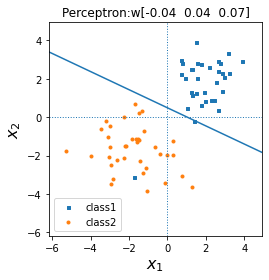

In [22]:
%run code/plot_xyw.py
plot_xyw(x_train, y_train, w.flatten(), X0=True)